# Dataset



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


X = 4 * np.random.rand(100,1) -2
Y = 4 + 2* X +  5 * X**2 + np.random.randn(100,1)

# Visualise Data Plot func



In [2]:

def PlotLinear(M,B):
  theta_0 = M  # The y-intercept
  theta_1 = B  # The slope

  X_line = np.linspace(X.min(), X.max(), 100) # Creates 100 evenly spaced points

  # 4. Calculate the predicted Y-values (the regression line)
  Y_pred = theta_0 + theta_1 * X_line


  # Add titles and labels

  plt.figure(figsize=(10, 6))
  plt.scatter(X, Y)
  plt.plot(X_line, Y_pred, color='red', linewidth=2, label=f'Regression Line: y = {theta_1}x + {theta_0}')

  plt.title('Years of Experience vs. Salary')
  plt.xlabel('YearsExperience')
  plt.ylabel('Salary')
  plt.grid(True)
  plt.show()



In [9]:

def PlotQuadratic(A,B,C):

  X_line = np.linspace(X.min(), X.max(), 100) # Creates 100 evenly spaced points

  # 4. Calculate the predicted Y-values (the regression line)
  Y_pred = (A *X_line**2) + (B * X_line) + (C)


  # Add titles and labels

  plt.figure(figsize=(10, 6))
  plt.scatter(X, Y)
  plt.plot(X_line, Y_pred, color='red', linewidth=2, label=f'Regression Line: {A}X^2 + {B}X + {C}')

  plt.title('Years of Experience vs. Salary')
  plt.xlabel('YearsExperience')
  plt.ylabel('Salary')
  plt.grid(True)
  plt.show()

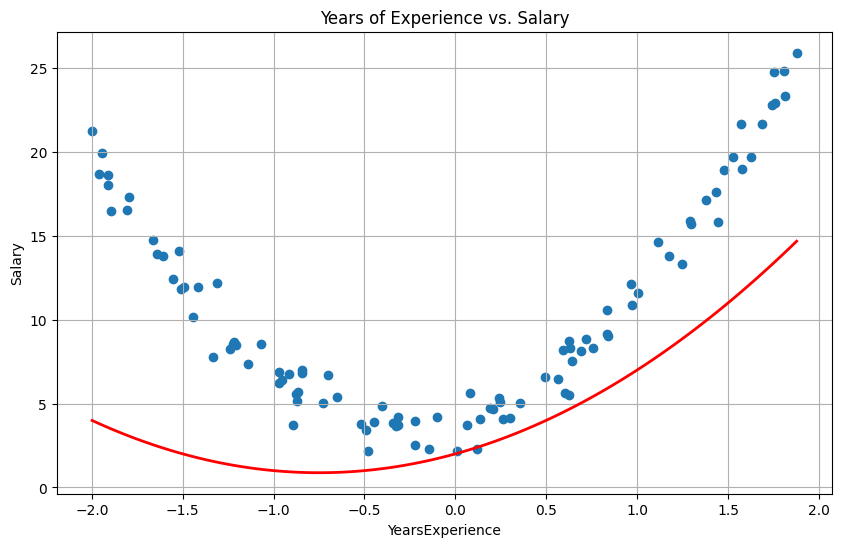

In [10]:
PlotQuadratic(2,3,2)

# Mean Squared Error Calculator

we're using the same data throughout, hence no need of DYNAMIC dynamic functions

In [4]:
def MSE(A,B,C):
  YStream = Y
  XStream = X
  Summation = 0
  for N in range(len(YStream)):

    ObservedValue = YStream[N]
    PredictedValue =  (A *XStream[N]**2) + (B * XStream[N]) + (C)

    Error = ObservedValue - PredictedValue
    ErrorSquared = Error ** 2

    Summation += ErrorSquared
    # print(f'Observed Value = {ObservedValue} --- Predicted Value = {PredictedValue} --- Error = {Error}')

  return Summation / len(YStream)


In [5]:
MSE(1,2,5)

array([42.87713231])

# Partial Derivatives
This is to look at the rate of change of the BiVariate MSE with respects to only 1 Parameter

In [14]:
def PartialDerivativeA(A,B,C):
  YStream = Y
  XStream = X
  Summation = 0
  for N in range(len(YStream)):

    ObservedValue = YStream[N]
    PredictedValue = (A * XStream[N] **2) + (B * XStream[N]) + C

    Error = PredictedValue - ObservedValue

    ErrorXPartialDer = Error * XStream[N] **2

    Summation = Summation + ErrorXPartialDer
    # print(f'Observed Value = {ObservedValue} --- Predicted Value = {PredictedValue} --- Error = {Error}')

  return 2 * Summation / len(YStream)


In [11]:
def PartialDerivativeB(A,B,C):
  YStream = Y
  XStream = X
  Summation = 0
  for N in range(len(YStream)):

    ObservedValue = YStream[N]
    PredictedValue = (A * XStream[N] **2) + (B * XStream[N]) + C

    Error = PredictedValue - ObservedValue

    ErrorXPartialDer = Error * XStream[N]

    Summation = Summation + ErrorXPartialDer
    # print(f'Observed Value = {ObservedValue} --- Predicted Value = {PredictedValue} --- Error = {Error}')

  return 2 * Summation / len(YStream)

In [12]:
def PartialDerivativeC(A,B,C):
  YStream = Y
  XStream = X
  Summation = 0
  for N in range(len(YStream)):

    ObservedValue = YStream[N]
    PredictedValue = (A * XStream[N] **2) + (B * XStream[N]) + C

    Error = PredictedValue - ObservedValue

    ErrorXPartialDer = Error

    Summation = Summation + ErrorXPartialDer
    # print(f'Observed Value = {ObservedValue} --- Predicted Value = {PredictedValue} --- Error = {Error}')

  return 2 * Summation / len(YStream)

# Gradient Descent Iteration Steps

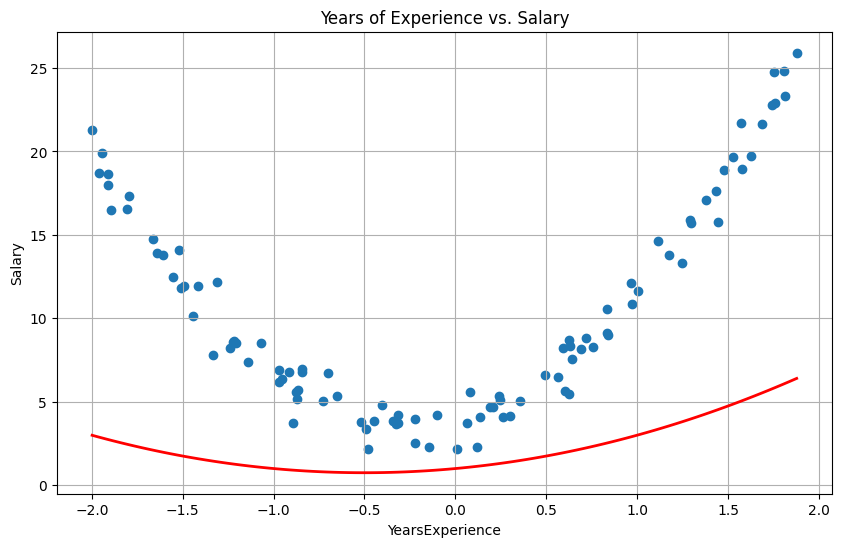

Final Parameters give an MSE Of [0.94773619], Parameters are A: [5.12893972]  B: [2.1860631] C: [3.87832041]


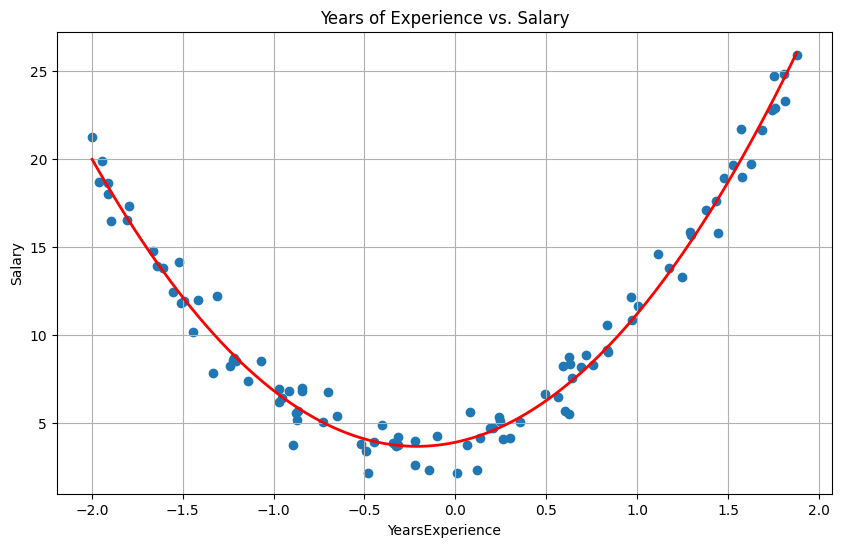

In [15]:
Alpha = 0.01
A = 1
B = 1
C = 1

PlotQuadratic(A,B,C)

MaxIterations = 1000

MSE_History = [MSE(A,B,C)]

for I in range(MaxIterations):
  A = A - (Alpha * PartialDerivativeA(A,B,C))
  B = B - (Alpha * PartialDerivativeB(A,B,C))
  C = C - (Alpha * PartialDerivativeC(A,B,C))
  MSE_History.append(MSE(A,B,C))


print(f'Final Parameters give an MSE Of {MSE(A,B,C)}, Parameters are A: {A}  B: {B} C: {C}')

PlotQuadratic(A,B,C)
